
# Project 1

**Problem Statement:** <br>
*Build a model that can estimate the fare amount for a taxi ride based on the given dataset of input features such as pickup and drop-off location coordinates, pickup time and the number of passengers.*

- Regression should be used because target variable (fare_amount) is numerical

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Loading data

In [2]:
# df = pd.read_csv("https://raw.githubusercontent.com/Premalathasuccess/Datasets/main/TaxiFare.csv")

In [3]:
df = pd.read_csv("DataSets/TaxiFare.csv")

### Exploring data

In [4]:
df.shape

(50000, 8)

---

In [5]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


---

In [6]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

- date_time_of_pickup is of object data type. This need to be converted to datetime format.

In [7]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'], format = '%Y-%m-%d %H:%M:%S %Z')

In [8]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

---

In [9]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

---

In [10]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

- No missing value

---

In [11]:
dup = df.duplicated()
dup.sum()

0

- No duplicated row

---

In [12]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


- Minimum amount is negative (not valid)
- Minimum no_of_passenger is 0
 - for New York longitude ranges between -75 and -72, and the latitude ranges between 40 and 42. but some coordinates in the data are out of this range

**dropping rows with no_of_passenger = 0**

In [13]:
df.drop(df[df['no_of_passenger']==0].index, axis=0, inplace = True)

**dropping rows with negative fare amount**

In [14]:
df = df[df['amount'] >= 1] # taking values greater than 1

**dropping coordinates which are out of bounds**

In [15]:
df = df[ (df['longitude_of_pickup'] >= -75) & 
         (df['longitude_of_pickup'] <= -72) &
         (df['latitude_of_pickup'] >= 40) &
         (df['latitude_of_pickup'] <= 42) &
        
         (df['longitude_of_dropoff'] >= -75) & 
         (df['longitude_of_dropoff'] <= -72) &
         (df['latitude_of_dropoff'] >= 40) &
         (df['latitude_of_dropoff'] <= 42) ]

In [16]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000
mean,11.366245,-73.975152,40.751129,-73.974007,40.751586,1.674818
std,9.660886,0.039731,0.030844,0.038624,0.033574,1.288838
min,2.500000,-74.711648,40.121653,-74.755480,40.164927,1.000000
25%,6.000000,-73.992308,40.736522,-73.991333,40.735917,1.000000
50%,8.500000,-73.982122,40.753450,-73.980492,40.754127,1.000000
75%,12.500000,-73.968381,40.767781,-73.965336,40.768482,2.000000
max,200.000000,-72.856968,41.650000,-72.854940,41.543217,6.000000


---

### Fare amount Visualization

Text(0.5, 0, 'Fare amount')

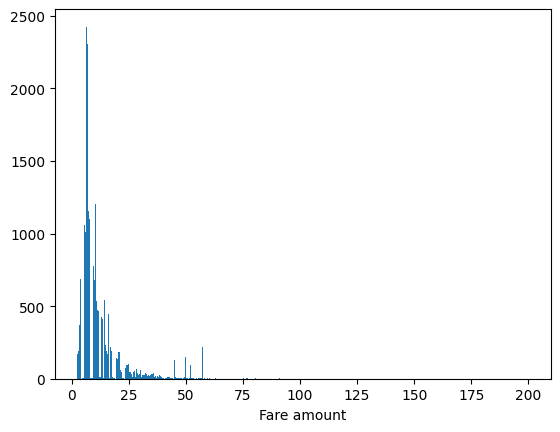

In [17]:
plt.hist(x='amount', data = df, bins=1000 )
plt.xlabel('Fare amount')

In [18]:
df[df['amount']>60]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
649,34:41.0,66.3,2009-09-19 10:34:41+00:00,-74.438233,40.993260,-74.185996,40.693874,2
1335,19:58.0,180.0,2013-01-16 20:19:58+00:00,-74.429332,40.500046,-74.429332,40.500046,1
1483,49:13.0,165.0,2009-08-07 21:49:13+00:00,-73.633363,41.032490,-73.633671,41.032598,1
1494,18:00.0,70.0,2009-09-01 14:18:00+00:00,-74.105395,40.707137,-74.105402,40.707113,1
1709,49:37.0,65.5,2014-07-31 14:49:37+00:00,-73.990904,40.760694,-74.177083,40.694982,1
...,...,...,...,...,...,...,...,...
47421,49:43.0,73.3,2011-06-11 18:49:43+00:00,-73.978784,40.762606,-74.177516,40.690630,1
48764,02:25.0,74.0,2013-02-21 18:02:25+00:00,-73.988107,40.743634,-73.820494,40.680960,1
48908,03:00.0,68.0,2014-08-31 12:03:00+00:00,-73.973597,40.763912,-74.177460,40.695307,1
49399,48:36.0,66.7,2012-07-12 05:48:36+00:00,-73.986490,40.739745,-74.179668,40.688833,1


**dropping rows with amount>60**

In [19]:
df = df[df['amount']<=60]

<AxesSubplot: ylabel='Density'>

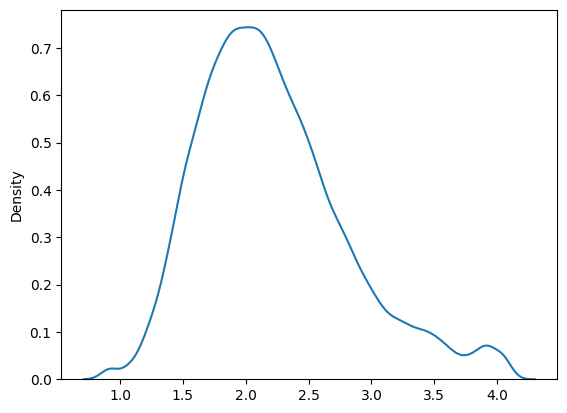

In [20]:
sns.kdeplot(np.log(df['amount'].values))

In [21]:
df.shape

(48667, 8)

In [22]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,48667.000000,48667.000000,48667.000000,48667.000000,48667.000000,48667.000000
mean,11.194968,-73.975225,40.751123,-73.973891,40.751626,1.674852
std,8.930398,0.039177,0.030566,0.037258,0.033103,1.289026
min,2.500000,-74.711648,40.121653,-74.755480,40.164927,1.000000
25%,6.000000,-73.992307,40.736526,-73.991294,40.736047,1.000000
50%,8.500000,-73.982125,40.753448,-73.980474,40.754168,1.000000
75%,12.500000,-73.968403,40.767783,-73.965354,40.768489,2.000000
max,60.000000,-72.856968,41.650000,-72.854940,41.543217,6.000000


### Distance and time Visualization

**Extracting useful info from date_time_of_pickup**

In [23]:
df['date'] = df['date_time_of_pickup'].dt.day.astype("int8")
df['year'] = df['date_time_of_pickup'].dt.year.astype("int32")
df['hour'] = df['date_time_of_pickup'].dt.hour.astype("int8")
df['month'] = df['date_time_of_pickup'].dt.month.astype("int8")
df['day of Week'] = df['date_time_of_pickup'].dt.dayofweek.astype("int8")

In [24]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date,year,hour,month,day of Week
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,2009,17,6,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,2010,16,1,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,2011,0,8,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,2012,4,4,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,2010,7,3,1


In [25]:
df.shape

(48667, 13)

---

<AxesSubplot: xlabel='hour', ylabel='count'>

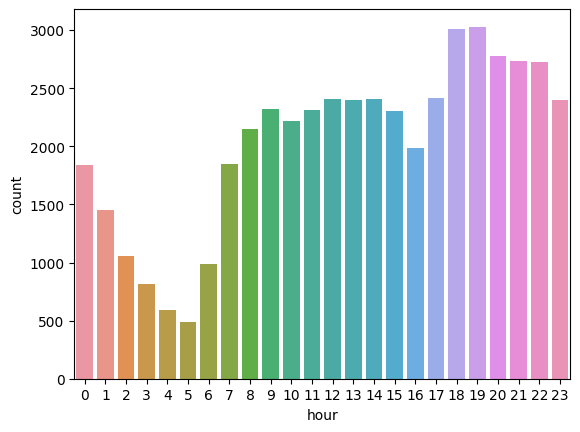

In [26]:
sns.countplot(x='hour', data = df)

- Less number of trips in early morning

C:\Users\91768\AppData\Local\Temp\ipykernel_4244\1363655661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

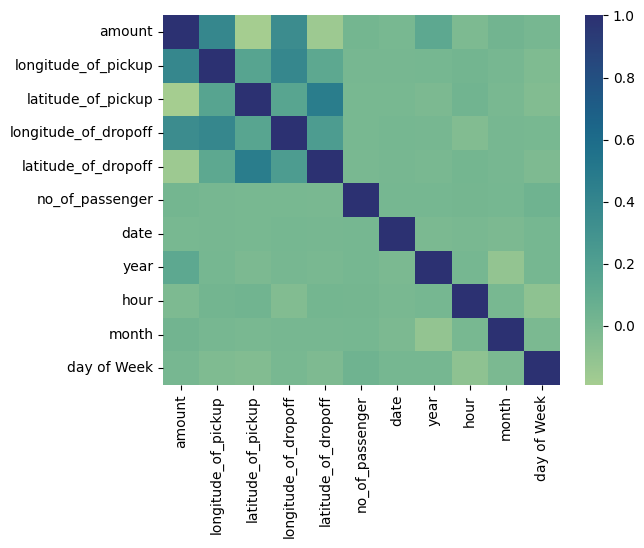

In [27]:
corr = df.corr()
sns.heatmap(corr, cmap = 'crest')

**Calculating distance**

In [28]:
def distance(lat1, lon1, lat2, lon2):
    p = np.pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p) * np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p))/2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [29]:
df['distance_miles'] = distance(df['latitude_of_pickup'], 
                                df['longitude_of_pickup'],
                                df['latitude_of_dropoff'],
                                df['longitude_of_dropoff'])

In [30]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date,year,hour,month,day of Week,distance_miles
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,2009,17,6,0,0.640487
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,2010,16,1,1,5.250670
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,2011,0,8,3,0.863411
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,2012,4,4,5,1.739386
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,2010,7,3,1,1.242218


In [31]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date,year,hour,month,day of Week,distance_miles
count,48667.000000,48667.000000,48667.000000,48667.000000,48667.000000,48667.000000,48667.000000,48667.000000,48667.000000,48667.000000,48667.000000,48667.000000
mean,11.194968,-73.975225,40.751123,-73.973891,40.751626,1.674852,15.663858,2011.739351,13.485935,6.275669,3.030740,2.067986
std,8.930398,0.039177,0.030566,0.037258,0.033103,1.289026,8.660622,1.867881,6.504855,3.461656,1.956961,2.396339
min,2.500000,-74.711648,40.121653,-74.755480,40.164927,1.000000,1.000000,2009.000000,0.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992307,40.736526,-73.991294,40.736047,1.000000,8.000000,2010.000000,9.000000,3.000000,1.000000,0.784379
50%,8.500000,-73.982125,40.753448,-73.980474,40.754168,1.000000,16.000000,2012.000000,14.000000,6.000000,3.000000,1.339190
75%,12.500000,-73.968403,40.767783,-73.965354,40.768489,2.000000,23.000000,2013.000000,19.000000,9.000000,5.000000,2.436017
max,60.000000,-72.856968,41.650000,-72.854940,41.543217,6.000000,31.000000,2015.000000,23.000000,12.000000,6.000000,64.644331


---

Text(0.5, 1.0, 'Histogram of distance in miles')

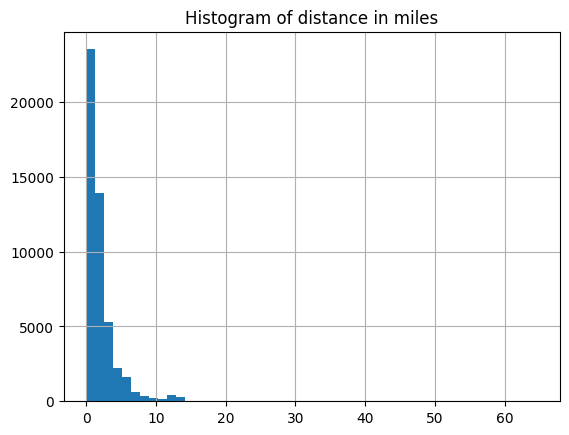

In [32]:
df['distance_miles'].hist(bins=50)
plt.title('Histogram of distance in miles')

In [33]:
df['distance_miles'].describe()

count    48667.000000
mean         2.067986
std          2.396339
min          0.000000
25%          0.784379
50%          1.339190
75%          2.436017
max         64.644331
Name: distance_miles, dtype: float64

**Following points should be noted**
- There are data with zero distance
- Most rides are just short rides.

---

In [34]:
  df.groupby('no_of_passenger')['distance_miles', 'amount'].mean()

C:\Users\91768\AppData\Local\Temp\ipykernel_4244\48516769.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('no_of_passenger')['distance_miles', 'amount'].mean()


,distance_miles,amount
no_of_passenger,,
1,2.035395,11.034049
2,2.195447,11.823067
3,2.052883,11.151848
4,2.020917,10.986914
5,2.104332,11.198474
6,2.212753,12.434328


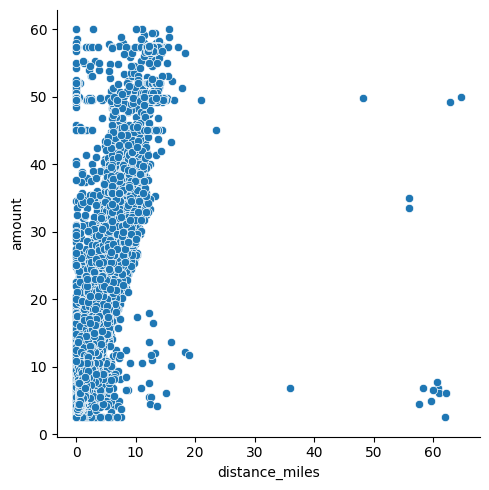

In [35]:
sns.relplot(x='distance_miles', y='amount', data=df)

In [36]:
df[df['distance_miles']==0][['amount', 'no_of_passenger', 'distance_miles']].sample(10)

,amount,no_of_passenger,distance_miles
46746,6.5,4,0.0
46326,7.0,1,0.0
11593,2.9,5,0.0
1214,9.3,1,0.0
17707,5.3,2,0.0
45811,5.3,2,0.0
29613,2.5,1,0.0
27461,2.5,1,0.0
12725,5.3,1,0.0
48454,2.5,1,0.0


- There are data with zero distance but still there are charges for it. 
- from above table we can see that for zero distance the prices are not constant, so it can't be cancelation charge
- There are data with greater than 50 miles distance but the fare amount is low. 

**Removing rows with distance < 0.05 miles**

In [37]:
df.shape

(48667, 14)

In [38]:
df = df[ df['distance_miles'] >= 0.05 ]

In [39]:
df.shape

(47887, 14)

---

In [40]:
df['fare_per_mile'] = df['amount'] / df['distance_miles']

In [41]:
df['fare_per_mile'].describe()

count    47887.000000
mean         7.373441
std         11.541946
min          0.040326
25%          4.755660
50%          6.125043
75%          8.071983
max        958.097215
Name: fare_per_mile, dtype: float64

Text(0, 0.5, 'fare per distance')

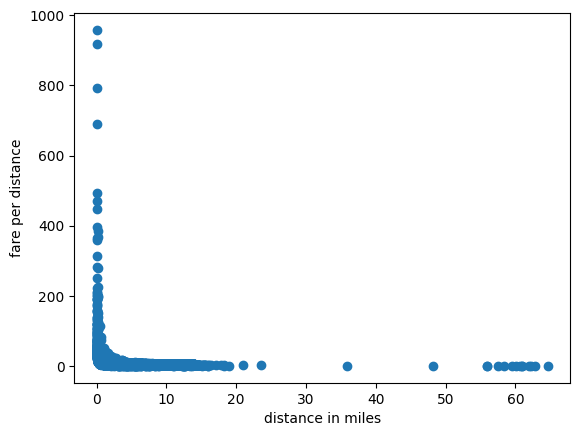

In [42]:
plt.scatter(df['distance_miles'], df['fare_per_mile'])
plt.xlabel('distance in miles')
plt.ylabel('fare per distance')

- fare per mile is high for shorter ride

---

In [43]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'date', 'year', 'hour', 'month', 'day of Week',
       'distance_miles', 'fare_per_mile'],
      dtype='object')

In [44]:
df.drop(['unique_id','date_time_of_pickup', 'fare_per_mile'], axis=1, inplace=True)

In [45]:
df.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'date', 'year', 'hour', 'month', 'day of Week', 'distance_miles'],
      dtype='object')

### Training Model

In [46]:
X = df.drop(['amount'], axis=1)
Y = df[['amount']]

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc_X = StandardScaler()

In [50]:
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.fit_transform(X_test)

#### Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

LinearRegression()

In [53]:
model_LR.score(X_train, Y_train)

0.7188847768305009

In [54]:
model_LR.score(X_test, Y_test)

0.7473248184742776

#### Linear Regression with Standardization

In [55]:
model_LR_sc = LinearRegression()
model_LR_sc.fit(X_train_sc, Y_train)

LinearRegression()

In [56]:
model_LR_sc.score(X_train_sc, Y_train)

0.718884776830501

In [57]:
model_LR_sc.score(X_test_sc, Y_test)

0.7473930385959575

#### KNN Regression

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [59]:
model_KR = KNeighborsRegressor(n_neighbors=10)
model_KR.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=10)

In [60]:
model_KR.score(X_train, Y_train)

0.8293620870265824

In [61]:
model_KR.score(X_test, Y_test)

0.7970018515460056

#### KNN Regression with Standardization

In [62]:
model_KR_sc = KNeighborsRegressor(n_neighbors = 10)
model_KR_sc.fit(X_train_sc, Y_train)

KNeighborsRegressor(n_neighbors=10)

In [63]:
model_KR_sc.score(X_train_sc, Y_train)

0.8623737091676339

In [64]:
model_KR_sc.score(X_test_sc, Y_test)

0.8359489026804111

#### SVR

In [65]:
from sklearn.svm import SVR

In [72]:
model_SR = SVR(kernel = 'linear', C = 0.01)
model_SR.fit(X_train, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.01, kernel='linear')

In [73]:
model_SR.score(X_train, Y_train)

0.6771944348645824

In [74]:
model_SR.score(X_test, Y_test)

0.7043835105351367

#### SVR with Standardization

In [75]:
model_SR_sc = SVR()
model_SR_sc.fit(X_train_sc, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [76]:
model_SR_sc.score(X_train_sc, Y_train)

0.8638128613673492

In [77]:
model_SR_sc.score(X_test_sc, Y_test)

0.8680698399187587

#### Decision Tree Regression

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
model_DR = DecisionTreeRegressor( min_samples_leaf=80)
model_DR.fit(X_train, Y_train)

DecisionTreeRegressor(min_samples_leaf=80)

In [80]:
model_DR.score(X_train, Y_train)

0.8656808291204503

In [81]:
model_DR.score(X_test, Y_test)

0.8666086844591787

#### Bagging Regression

In [82]:
from sklearn.ensemble import BaggingRegressor

In [83]:
model_BR = BaggingRegressor(estimator=model_DR)
model_BR.fit(X_train, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=80))

In [84]:
model_BR.score(X_train, Y_train)

0.8651634477771433

In [85]:
model_BR.score(X_test, Y_test)

0.8693689796799752

#### Ada Boosting Regression

In [86]:
from sklearn.ensemble import AdaBoostRegressor

In [87]:
model_AR = AdaBoostRegressor(estimator=model_DR, n_estimators=100, learning_rate=0.01)
model_AR.fit(X_train, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=80),
                  learning_rate=0.01, n_estimators=100)

In [88]:
model_AR.score(X_train, Y_train)

0.8808436996184521

In [89]:
model_AR.score(X_test, Y_test)

0.8750683071197056

#### Gradient Boosting

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

In [91]:
model_GR = GradientBoostingRegressor()
model_GR.fit(X_train, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [92]:
model_GR.score(X_train, Y_train)

0.8898667765601069

In [93]:
model_GR.score(X_test, Y_test)

0.8801918765688794

#### Random Forest Regression

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
model_RR = RandomForestRegressor(n_estimators=100, max_depth=5)
model_RR.fit(X_train, Y_train)

C:\Users\91768\AppData\Local\Temp\ipykernel_4244\814773155.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RR.fit(X_train, Y_train)


RandomForestRegressor(max_depth=5)

In [96]:
model_RR.score(X_train, Y_train)

0.8627736502594254

In [97]:
model_RR.score(X_test, Y_test)

0.8631390615907583

---

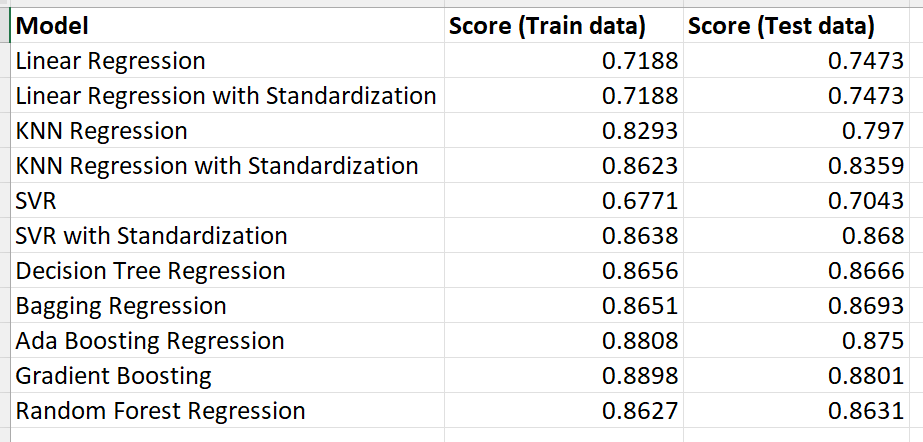

---

**By looking at the scores we can conclude that the best model is *model_GR* . i.e. Gradient Boosting**
- It has highest score for train as well as test data with compared to others
- no overfitting